# School Donation Analysis

In [4]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.offline as po
po.init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import datetime as dt
%matplotlib inline

In [5]:
#load datafiles
donations = pd.read_csv('Donations.csv')
donors = pd.read_csv('Donors.csv')
projects = pd.read_csv('Projects.csv')
resources = pd.read_csv('Resources.csv')
schools = pd.read_csv('Schools.csv')
teachers = pd.read_csv('Teachers.csv')

C:\Users\Pradeep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



Descibe and show data for columns ideas

In [7]:
print("Shape of donations dataframe is: ", donations.shape)
print("Shape of donors dataframe is: ", donors.shape)
print("Shape of projects dataframe is: ", projects.shape)
print("Shape of resources dataframe is: ", resources.shape)
print("Shape of schools dataframe is: ", schools.shape)
print("Shape of teachers dataframe is: ", teachers.shape)

Shape of donations dataframe is:  (4687884, 7)
Shape of donors dataframe is:  (2122640, 5)
Shape of projects dataframe is:  (1110017, 18)
Shape of resources dataframe is:  (7210448, 5)
Shape of schools dataframe is:  (72993, 9)
Shape of teachers dataframe is:  (402900, 3)


In [8]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [9]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [10]:
projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


In [11]:
resources.head()

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


In [12]:
schools.head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


In [13]:
teachers.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


In [14]:
donations.describe()

,Donation Amount,Donor Cart Sequence
count,4.687884e+06,4.687884e+06
mean,6.066879e+01,1.430545e+02
std,1.668996e+02,8.723086e+02
min,1.000000e-02,1.000000e+00
25%,1.482000e+01,1.000000e+00
50%,2.500000e+01,2.000000e+00
75%,5.000000e+01,1.200000e+01
max,6.000000e+04,1.811600e+04


In [15]:
donors.describe()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
count,2122640,1909543,2122640,2122640,1942580
unique,2122640,15204,52,2,1934
top,d9a4d9dd82d4fd4b58726d73621a6fe4,Chicago,California,No,606
freq,1,34352,294695,1910355,34628


In [16]:
projects.describe()

,Teacher Project Posted Sequence,Project Cost
count,1.110017e+06,1.110017e+06
mean,1.124050e+01,7.415240e+02
std,2.595475e+01,1.083256e+03
min,1.000000e+00,3.529000e+01
25%,1.000000e+00,3.351200e+02
50%,3.000000e+00,5.153500e+02
75%,9.000000e+00,8.675200e+02
max,4.970000e+02,2.557377e+05


In [17]:
resources.describe()

,Resource Quantity,Resource Unit Price
count,7.186149e+06,7.186138e+06
mean,2.816518e+00,5.341337e+01
std,8.866547e+00,1.863248e+02
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,7.260000e+00
50%,1.000000e+00,1.439000e+01
75%,2.000000e+00,3.640000e+01
max,4.125000e+03,9.708550e+04


In [18]:
schools.describe()

,School Percentage Free Lunch,School Zip
count,71852.000000,72993.000000
mean,58.556115,53382.093406
std,25.508378,29131.096568
min,0.000000,705.000000
25%,40.000000,29554.000000
50%,61.000000,53095.000000
75%,80.000000,78572.000000
max,100.000000,99950.000000


In [19]:
teachers.describe()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
count,402900,402872,402900
unique,402900,6,4699
top,617b5917a8e3fccf41ed5e080e148af5,Mrs.,2015-09-13
freq,1,202142,2067


Create new data by using datasets

In [21]:
data = pd.merge(donations,projects, how = 'inner', on = 'Project ID')

In [22]:
data2 = pd.merge(data,donors, how = 'inner', on = 'Donor ID')

In [23]:
data3 = pd.merge(data2,schools, how = 'inner', on = 'School ID')

In [25]:
data4 = pd.merge(data3,teachers, how = 'inner', on = 'Teacher ID')

In [28]:
data4.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,School ID,Teacher ID,Teacher Project Posted Sequence,...,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District,Teacher Prefix,Teacher First Project Posted Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
1,3cd4f1c5cfa0d495dadfead3153c936d,21aaadfba0becc3f052decf88cd31a75,1f4b5b6e68445c6c4a0509b3aca93f38,No,148.29,25,2017-03-30 01:34:18,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,11,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
2,8d9e1ec79b729185b7c61c6b57710b0d,1e20c3d1bce4a3def3a454868d29af30,1f4b5b6e68445c6c4a0509b3aca93f38,No,88.28,46,2017-10-19 17:59:52,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,19,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
3,9c5e7c5dd9a279e24147f101588c30fa,a2f24f363db1c03284a08ec1a863e467,1f4b5b6e68445c6c4a0509b3aca93f38,No,305.69,71,2018-01-25 17:01:41,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,21,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
4,b27c621c6cf61afa61e3a612193a11b2,821c83c092f4a97e416ced7747dde16c,1f4b5b6e68445c6c4a0509b3aca93f38,No,290.33,22,2016-12-22 15:51:26,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,9,...,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19


In [29]:
a = data4.columns.values.tolist()
a

['Project ID',
 'Donation ID',
 'Donor ID',
 'Donation Included Optional Donation',
 'Donation Amount',
 'Donor Cart Sequence',
 'Donation Received Date',
 'School ID',
 'Teacher ID',
 'Teacher Project Posted Sequence',
 'Project Type',
 'Project Title',
 'Project Essay',
 'Project Short Description',
 'Project Need Statement',
 'Project Subject Category Tree',
 'Project Subject Subcategory Tree',
 'Project Grade Level Category',
 'Project Resource Category',
 'Project Cost',
 'Project Posted Date',
 'Project Expiration Date',
 'Project Current Status',
 'Project Fully Funded Date',
 'Donor City',
 'Donor State',
 'Donor Is Teacher',
 'Donor Zip',
 'School Name',
 'School Metro Type',
 'School Percentage Free Lunch',
 'School State',
 'School Zip',
 'School City',
 'School County',
 'School District',
 'Teacher Prefix',
 'Teacher First Project Posted Date']

Which 10 states have most number of schools thats opened projects to gather donations ? plot the data using bar plot

In [32]:
s = schools['School State'].value_counts().sort_values(ascending = False).head(10)
s

California        8457
Texas             6485
New York          3819
Florida           3302
Illinois          3126
Michigan          2653
Ohio              2546
North Carolina    2543
Pennsylvania      2163
Georgia           2125
Name: School State, dtype: int64

In [35]:
s.iplot(kind='bar', xTitle= 'State',yTitle= 'Number of Schools', title= 'Number schools involved in projects by states')

What are the top 10 states in which schools gathered most amount of AVERAGE donation for their projects?

In [37]:
s2 = data4.groupby('School State')['Donation Amount'].mean().sort_values(ascending = False).head(10)

In [39]:
s2.iplot(kind='bar', xTitle= 'State',yTitle= 'Average donation per project', 
         title= 'Top 10 states with maximum donation', colorscale='paired' )

Analysis the Maximum, Minimum, mean, meadium and 25 and 75% percentile of Donations?

In [42]:
mean = np.mean(data4['Donation Amount'].dropna())
median = np.median(data4['Donation Amount'].dropna())
percentiles = np.percentile(data4['Donation Amount'].dropna(), [25,75])
minimum = data4['Donation Amount'].dropna().min()
maximum = data4['Donation Amount'].dropna().max()

print('Mean donation amount is: ', np.round(mean,2))
print('Median donation amount is: ', median)
print('25% and 75% donation amount is: ', percentiles)
print('Minimum donation amount is: ', minimum)
print('Maximumdonation amount is: ', maximum)

Mean donation amount is:  61.03
Median donation amount is:  25.0
25% and 75% donation amount is:  [15. 50.]
Minimum donation amount is:  0.01
Maximumdonation amount is:  60000.0


We can immediately observe from above statistics that our Donation Amount columns have lots of outliers since mean is 60
whereas as  median is 25 which shows that there are plently of outliers causing mean to rise, second indicator is that we have 25th and 75th percentile both below than mean. In other words although 75% of our data smaller than 50 we have a mean value  which is 60.66 which is a good indicator of outliers. Lastly we can easly say that maximum value is a huge outlier too.

In which percent the data has points greater or smaler than the value shown in the x-axis.

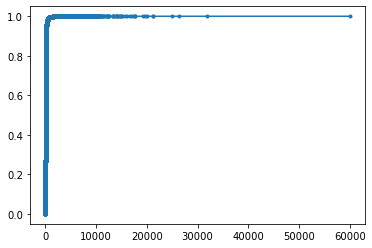

In [45]:
x = np.sort(data4['Donation Amount'].dropna())
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker = '.')

In which states there are more donations done by donors

In [46]:
s3 = data4.groupby('Donor State')['Donation ID'].count().sort_values(ascending = False).head(15)
s3

Donor State
California        693577
New York          350553
Texas             271348
Illinois          230350
Florida           229542
North Carolina    194465
other             184324
Pennsylvania      148752
Georgia           147897
Massachusetts     136845
Michigan          119337
Indiana           117470
Virginia          111740
New Jersey        109926
Ohio              107401
Name: Donation ID, dtype: int64

In [47]:
s3.iplot(kind='bar', xTitle= 'State',yTitle= 'Number of donations', 
         title= 'Donation count', colorscale='paired')

Now, it is time for a more advance questions ? is there a relationship between the number of projects offered and number of donations made by the donors. Which states performing better in this case? How many of them responding projec requests below average and which states are performing best in terms of donation per project ? In order to answer these qustion we must first get the number of project per state and then number of donation made per state. Then we should merge this two and plot a scatter plot to visualize it. Lets do it.

In [68]:
s4 = data4.groupby('School State')['Project ID'].count()
s5 = data4.groupby('Donor State')['Donation ID'].count()
df = pd.concat([s4,s5], axis = 1, keys = ['Projects','Donations'])

In [69]:
df = df.dropna()

In [70]:
df.head()

,Projects,Donations
Alabama,56871.0,50002
Alaska,13398.0,10729
Arizona,89746.0,83092
Arkansas,33144.0,28021
California,686255.0,693577


In [71]:
df.iplot(kind = 'scatter', xTitle= 'Projects',yTitle= 'Donations', 
         title= 'Project vs Donation', symbol= 'x',mode = 'markers',colorscale='paired' )

Fit a linear model which will basically indicate the relationship between projects anddonations

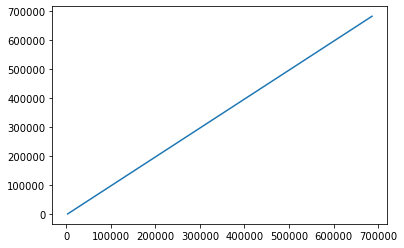

In [72]:
slope,intercept = np.polyfit(df.Projects,df.Donations,1)
x = np.array([df.Projects.min(),df.Projects.max()])
y = slope*x + intercept
plt.plot(x,y)

Combine the plots

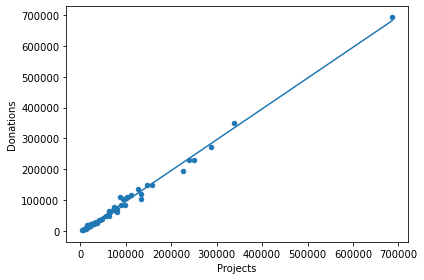

In [76]:
df.plot(kind ='scatter' ,x ='Projects' ,y= 'Donations')
slope,intercept = np.polyfit(df.Projects,df.Donations,1)
x = np.array([df.Projects.min(),df.Projects.max()])
y = slope*x + intercept
plt.plot(x,y)
plt.tight_layout()
plt.margins(0.05)

How may project type exists? What is the total donation amount for each of them

In [77]:
s6 = data4['Project Type'].value_counts()
s6

Teacher-Led                 4532463
Professional Development      43217
Student-Led                   32400
Name: Project Type, dtype: int64

In [78]:
s7 = data4.groupby('Project Type')['Donation Amount'].sum().astype(int)
s7

Project Type
Professional Development      2474442
Student-Led                   2711059
Teacher-Led                 276046772
Name: Donation Amount, dtype: int32

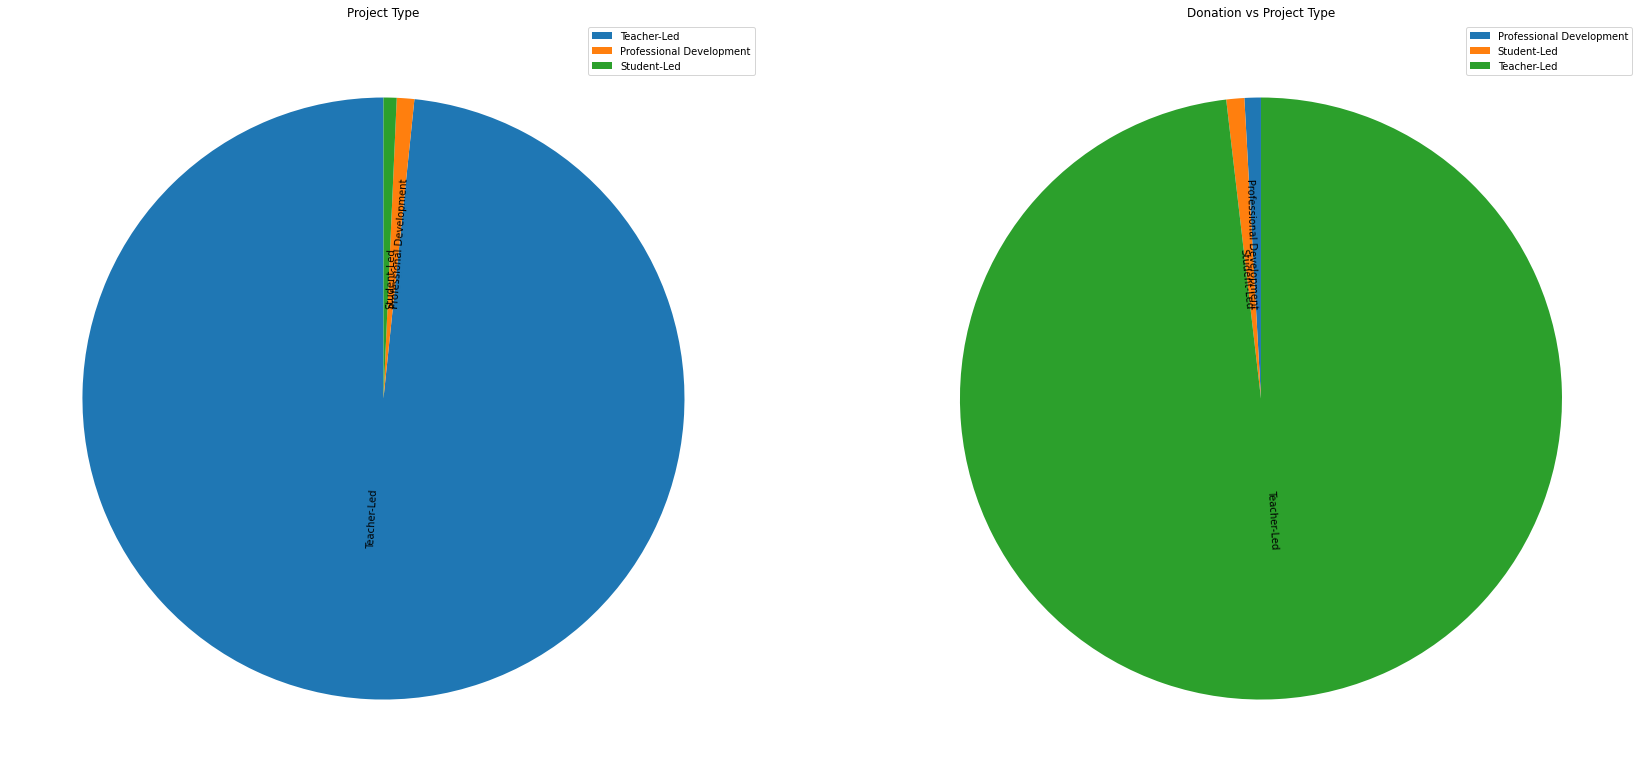

In [134]:
plt.subplot(1,2,1)
plt.title("Project Type")
plt.pie(s6,startangle=90,labels = s6.keys().tolist(),rotatelabels=True,labeldistance=0.3)
plt.legend()
plt.subplot(1,2,2)
plt.title("Donation vs Project Type")
plt.pie(s7,startangle=90, labels = s7.keys().tolist(),rotatelabels=True,labeldistance=0.3)
plt.legend()
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(25,25)
plt.show()

How many project subject category trees exists? Which one attracted the most donations? 

In [138]:
s8 = data4['Project Subject Category Tree'].value_counts().nunique()
s8

51

In [147]:
s9 = data4.groupby('Project Subject Category Tree')['Donation Amount'].sum().astype(int).sort_values(ascending = False).head(15)
s10 = s9/1000000
s10

Project Subject Category Tree
Literacy & Language                      59.463406
Math & Science                           46.378412
Literacy & Language, Math & Science      38.882421
Music & The Arts                         17.654172
Applied Learning                         11.536010
Health & Sports                          10.830324
Literacy & Language, Special Needs       10.037973
Special Needs                             8.669187
Applied Learning, Literacy & Language     7.691442
Math & Science, Literacy & Language       6.820461
History & Civics                          5.612012
Literacy & Language, Music & The Arts     5.038590
Applied Learning, Special Needs           5.036123
History & Civics, Literacy & Language     4.886560
Math & Science, Applied Learning          4.645578
Name: Donation Amount, dtype: float64

In [150]:
s10.iplot(kind='bar', xTitle= 'Project Subject Category Tree',yTitle= 'Donation Amount in millions', 
         title= 'Project Subject Category Tree vs Donation Amount', colorscale='paired')

Lets move to th timings now

What is mean time that takes a project to be fully funded after posted and how it varies  between states?

In [152]:
data4[['Project Posted Date','Project Fully Funded Date']].isnull().sum()

Project Posted Date               0
Project Fully Funded Date    437295
dtype: int64

In [154]:
data4[['Project Posted Date','Project Fully Funded Date']].head()

,Project Posted Date,Project Fully Funded Date
0,2016-05-13,2016-08-23
1,2017-03-18,2017-03-30
2,2017-10-18,2017-10-19
3,2017-11-27,2018-01-25
4,2016-09-05,2016-12-22


In [155]:
data4['Project Posted Date'] = pd.to_datetime(data4['Project Posted Date'])

In [156]:
data4['Project Fully Funded Date'] = pd.to_datetime(data4['Project Fully Funded Date'])

In [157]:
data4['Funding time'] = data4['Project Fully Funded Date'] - data4['Project Posted Date']

In [158]:
data4[['Funding time','Project Posted Date','Project Fully Funded Date']].head()

,Funding time,Project Posted Date,Project Fully Funded Date
0,102 days,2016-05-13,2016-08-23
1,12 days,2017-03-18,2017-03-30
2,1 days,2017-10-18,2017-10-19
3,59 days,2017-11-27,2018-01-25
4,108 days,2016-09-05,2016-12-22


In [159]:
data4[['Funding time','Project Posted Date','Project Fully Funded Date']].isnull().sum()

Funding time                 437295
Project Posted Date               0
Project Fully Funded Date    437295
dtype: int64

In [162]:
data5 = data4[pd.notnull(data4['Funding time'])]
data5[['Funding time','Project Posted Date','Project Fully Funded Date']].isnull().sum()

Funding time                 0
Project Posted Date          0
Project Fully Funded Date    0
dtype: int64

In [163]:
data5['Funding time'] = data5['Funding time'].dt.days

In [164]:
data5[['Funding time','Project Posted Date','Project Fully Funded Date']].head()

,Funding time,Project Posted Date,Project Fully Funded Date
0,102,2016-05-13,2016-08-23
1,12,2017-03-18,2017-03-30
2,1,2017-10-18,2017-10-19
3,59,2017-11-27,2018-01-25
4,108,2016-09-05,2016-12-22


In [165]:
wrong_overall_mean_time = data5['Funding time'].mean()
wrong_overall_mean_time

35.47807690878336

In [169]:
overall_mean_time = data5.groupby('Project ID')['Funding time'].mean()
output = overall_mean_time.mean()
output

32.171606457403584

In [171]:
#Average funding time for each state
state_project_funding_time = data5.groupby(['School State','Project ID'])['Funding time'].mean()
state_project_funding_time

School State  Project ID                      
Alabama       00002d44003ed46b066607c5455a999a     41
              000e336c167aae4394ac037e002aa2b9     58
              00105d1128dbbf4e0774804052b5bedb     27
              0014d0f8aa7dbbd5705956d7458a0d9f     15
              001a70c8fdb47880cbcde5675193b877     18
                                                 ... 
Wyoming       fe83942b407a1f868cb48b2bbeab4988     23
              febb789ba78badf633114020f1483392      2
              ff1d119bac584ec35d3740f83f3daa7d    112
              ff43f8665a9ed6a009f395b18d96734a     64
              ffbcf2e301bd4b2e80dc9faea5b02a57    110
Name: Funding time, Length: 720847, dtype: int64

In [173]:
state_average_project_funding_time = state_project_funding_time.groupby('School State').mean()
state_average_project_funding_time.round(0)

School State
Alabama                 36.0
Alaska                  34.0
Arizona                 35.0
Arkansas                35.0
California              32.0
Colorado                31.0
Connecticut             32.0
Delaware                33.0
District of Columbia    26.0
Florida                 31.0
Georgia                 35.0
Hawaii                  27.0
Idaho                   31.0
Illinois                30.0
Indiana                 32.0
Iowa                    37.0
Kansas                  31.0
Kentucky                33.0
Louisiana               36.0
Maine                   35.0
Maryland                32.0
Massachusetts           32.0
Michigan                32.0
Minnesota               31.0
Mississippi             37.0
Missouri                31.0
Montana                 31.0
Nebraska                36.0
Nevada                  35.0
New Hampshire           31.0
New Jersey              32.0
New Mexico              35.0
New York                33.0
North Carolina          32.0
N

Which states are the best and which are the worst performing in term of this criteria(mean project fully funded time)??

In [174]:
fast = state_average_project_funding_time.round(0)
fast[fast<32].sort_values().head(10)

School State
District of Columbia    26.0
Hawaii                  27.0
Wyoming                 29.0
Vermont                 30.0
Illinois                30.0
Oregon                  30.0
Pennsylvania            31.0
Oklahoma                31.0
New Hampshire           31.0
Colorado                31.0
Name: Funding time, dtype: float64

In [175]:
fast_funding = fast[fast<32].sort_values().head(10)
fast_funding.iplot(kind='bar', xTitle= 'States',yTitle= 'Fully funding time(in days)', 
         title= 'States that fund projects earlier than others', colorscale='paired')

In [177]:
slow = state_average_project_funding_time.round(0)
slow[fast>32].sort_values(ascending = False).head(10)

School State
Mississippi      37.0
Iowa             37.0
Nebraska         36.0
Louisiana        36.0
Utah             36.0
West Virginia    36.0
Alabama          36.0
North Dakota     35.0
New Mexico       35.0
Nevada           35.0
Name: Funding time, dtype: float64

In [181]:
slow_funding = slow[fast>32].sort_values(ascending = False).head(10)
slow_funding.iplot(kind='bar', xTitle= 'States',yTitle= 'Fully funding time(in days)', 
         title= 'States that fund projects late than others')